### **Testing the model**

In [ ]:
from keras.models import load_model

classifier = load_model('/content/drive/MyDrive/Crop Disease Recognition/Model/crop_disease.h5')



>> Class: Rust
>> Prediction: 


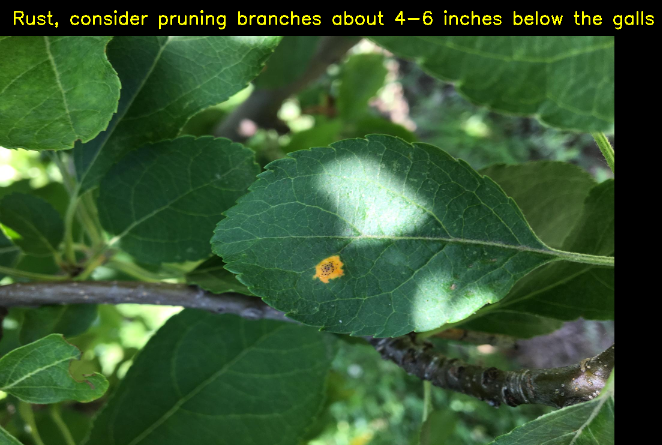



>> Class: Rust
>> Prediction: 


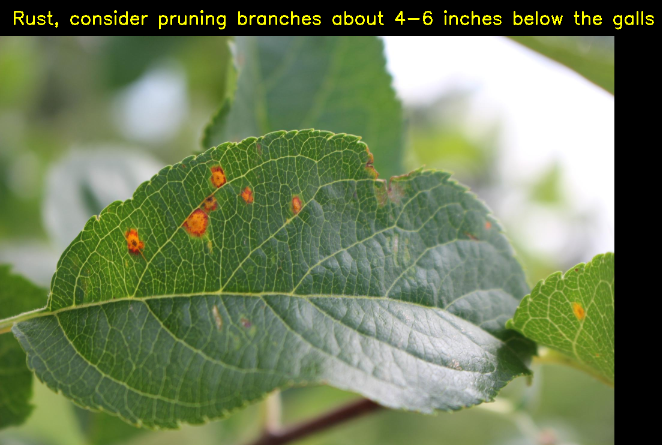



>> Class: Multiple diseases
>> Prediction: 


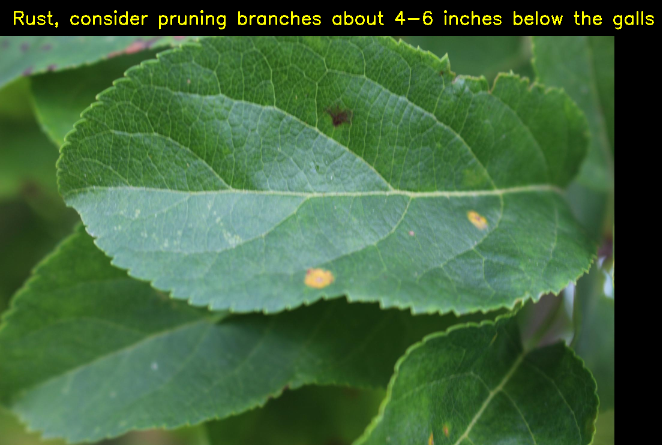



>> Class: Multiple diseases
>> Prediction: 


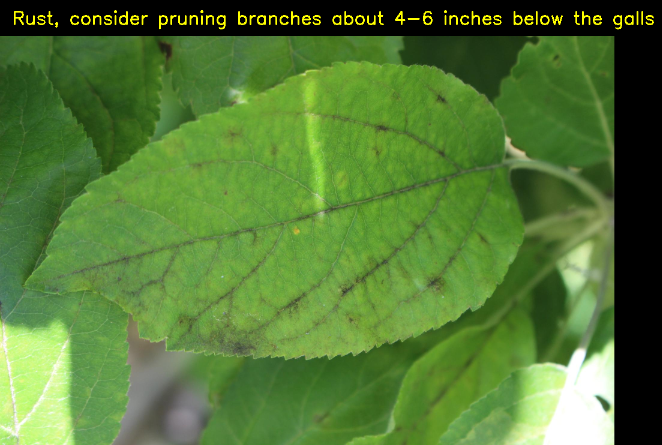



>> Class: Scab
>> Prediction: 


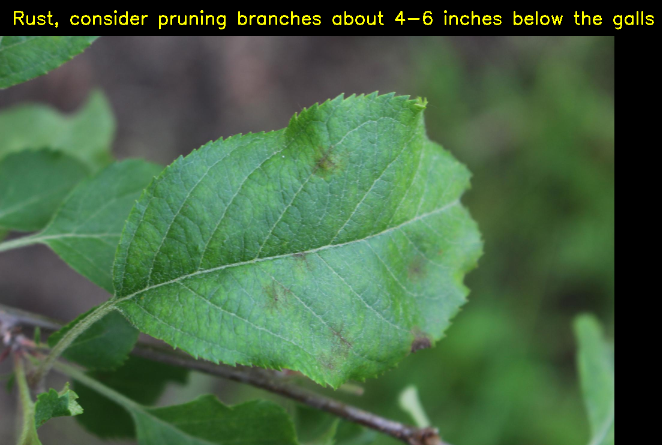



>> Class: Scab
>> Prediction: 


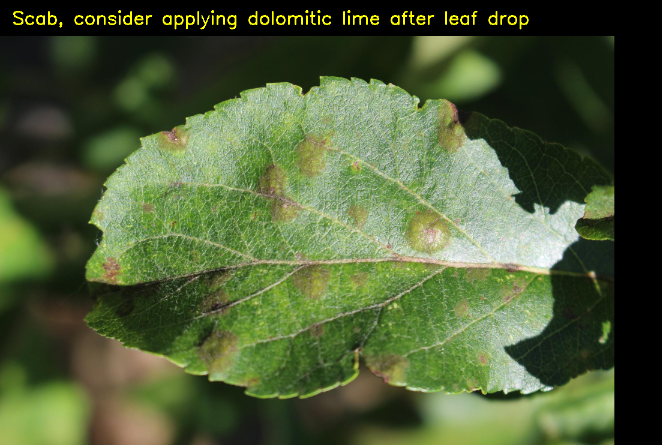



>> Class: Healthy
>> Prediction: 


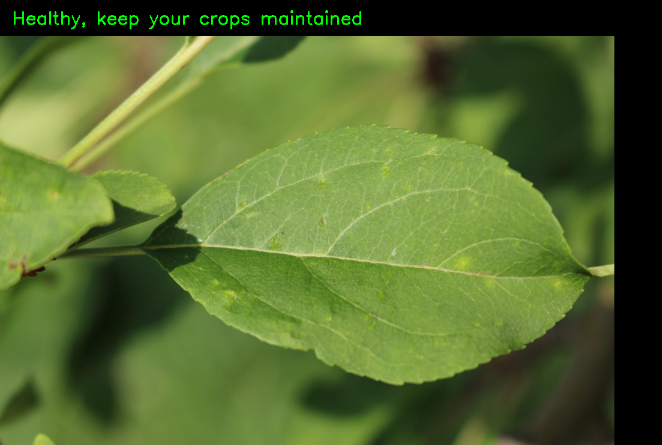



>> Class: Healthy
>> Prediction: 


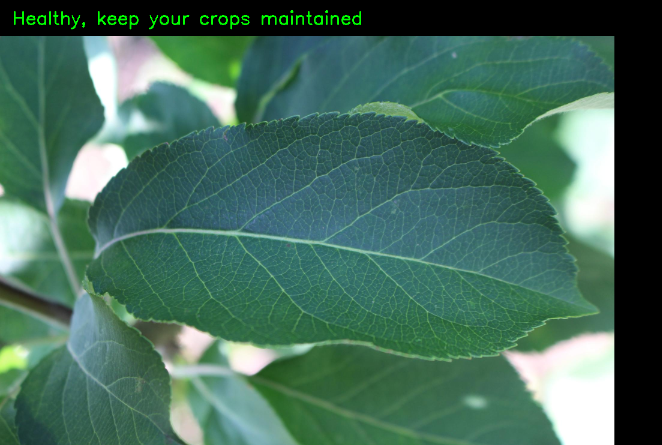



>> Class: Multiple diseases
>> Prediction: 


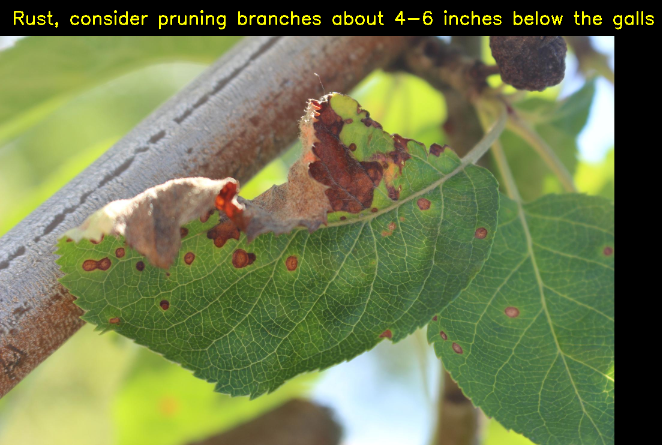



>> Class: Scab
>> Prediction: 


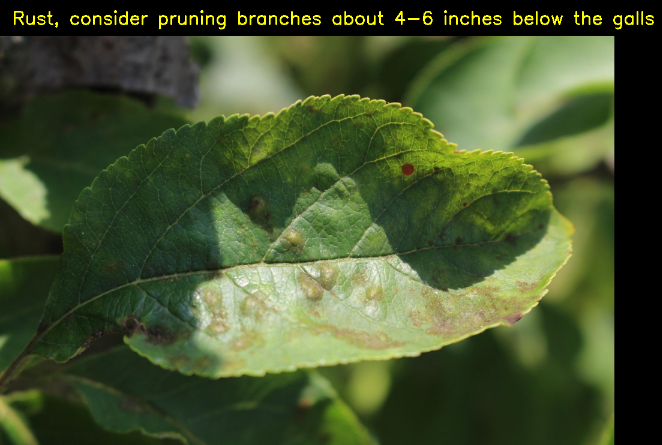

In [ ]:
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
from google.colab.patches import cv2_imshow

pred_classes = { "[0]": "Healthy", "[1]": "Multiple diseases", "[2]": "Rust", "[3]": "Scab" }                
dir_names = { "healthy": "Healthy", "multiple_diseases": "Multiple diseases", "rust": "Rust", "scab": "Scab" }
facts = { '[0]': ', keep your crops maintained',
          '[1]': ', preventive sprays (captan, sulfur, fungicides) recommended',
          '[2]': ', consider pruning branches about 4-6 inches below the galls',
          '[3]': ', consider applying dolomitic lime after leaf drop'
        }

y_true, y_pred = [], []

def getRandomImage(path):
    folders = listdir(path)
    rand_dir = np.random.randint(0, len(folders))
    path_class = folders[rand_dir]
    y_true.append(dir_names[str(path_class)])
    print("\n\n>> Class: " + dir_names[str(path_class)])
    file_path = path + '/' + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    rand_file_idx = np.random.randint(0, len(file_names))
    image_name = file_names[rand_file_idx]
    return cv2.imread(file_path + "/" +image_name)    

def textAndBorder(pred, img):
    disease = pred_classes[str(pred)]
    pred_color = { '[0]': (0,255,0), '[1]': (0,0,255), '[2]': (0,255,255), '[3]': (0,255,255) }
    expanded_image = cv2.copyMakeBorder(img, 60, 0, 0, 80, cv2.BORDER_CONSTANT, value=(0,0,0))
    cv2.putText(expanded_image, disease + facts[str(pred)], (20,40) , cv2.FONT_HERSHEY_SIMPLEX, 1, pred_color[str(pred)], 2)
    expanded_image = cv2.resize(expanded_image, None, fx = 0.6, fy = 0.6)
    cv2_imshow(expanded_image)

for i in range(10):
    input_im = getRandomImage("/content/drive/MyDrive/Crop Disease Recognition/Dataset/Splits/test")
    input_original = input_im.copy()
    input_original = cv2.resize(input_original, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
    
    input_img = cv2.resize(input_im, (224, 224), interpolation=cv2.INTER_LINEAR)
    input_img = input_img / 255.
    input_img = input_img.reshape(1,224,224,3) 
    
    pred = classifier.predict(input_img, 1, verbose = 0)
    res = np.argmax(pred, axis=1)
    y_pred.append(pred_classes[str(res)])

    print(">> Prediction: ")
    textAndBorder(res, input_original)

In [ ]:
print('Actual: ', y_true)
print('Predicted:', y_pred)

Actual:  ['Scab', 'Multiple diseases', 'Healthy', 'Scab', 'Multiple diseases', 'Healthy', 'Rust', 'Rust', 'Multiple diseases', 'Healthy']
Predicted: ['Rust', 'Rust', 'Rust', 'Rust', 'Rust', 'Healthy', 'Rust', 'Rust', 'Rust', 'Rust']


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

classification_metrics = metrics.classification_report(y_true, y_pred, target_names=pred_classes.values(), zero_division=0)
print(classification_metrics)

                   precision    recall  f1-score   support

          Healthy       1.00      0.33      0.50         3
Multiple diseases       0.00      0.00      0.00         3
             Rust       0.22      1.00      0.36         2
             Scab       0.00      0.00      0.00         2

         accuracy                           0.30        10
        macro avg       0.31      0.33      0.22        10
     weighted avg       0.34      0.30      0.22        10

